In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data Collection and Processing**

importing data

In [3]:
data = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

#printing data
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#printing last 5 data vectors
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and columns
data.shape

(2290, 6)

In [6]:
#getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
data['Date'] = pd.to_datetime(data['Date'])

Correlation:
  1. Positive Correlation
  2. Negative Correlation
  3. Zero Correlation

In [9]:
correlation = data.corr()

<Axes: >

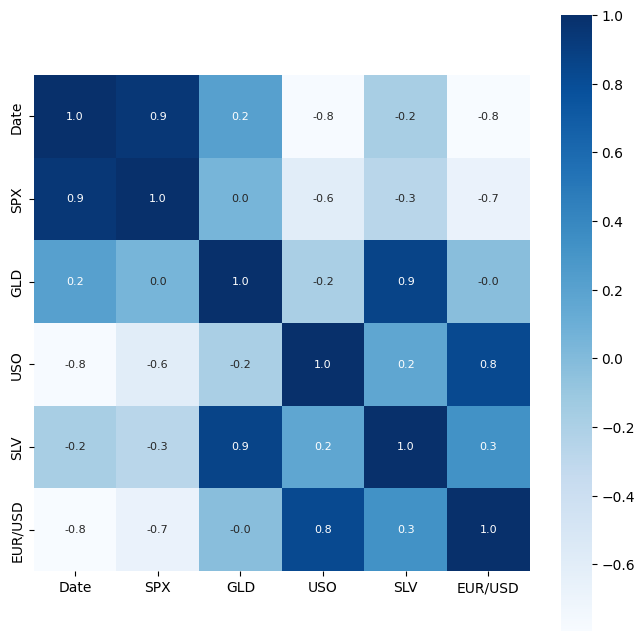

In [10]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [11]:
#correlation value of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


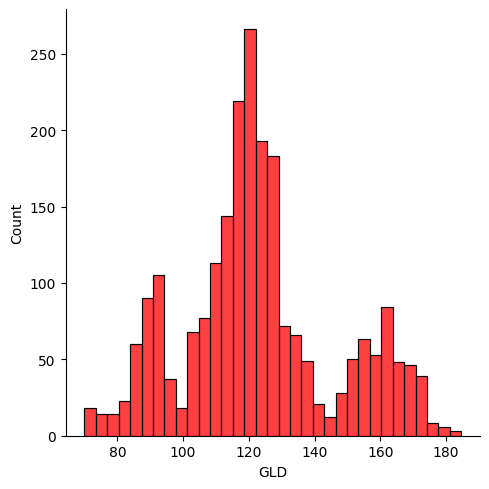

In [12]:
#Checking the distribution of Gold Price
sns.displot(data['GLD'], color='red')

splitting features & targets

In [13]:
x = data.drop(['Date', 'GLD'], axis=1)
y = data['GLD']

In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training & test data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

# Model Training
**Random Forest Regressor**

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

**Training**

In [18]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation**

In [19]:
#Prediction on Test Data
test_data_pred = regressor.predict(x_test)

In [20]:
print(test_data_pred)

[168.67329958  81.97479984 115.97820019 127.56460066 120.75290121
 154.69999785 150.55219861 126.14980039 117.43409864 126.09030058
 116.60260092 171.00090086 141.28479834 168.10649827 115.33010058
 117.58370038 137.64350342 170.30260109 159.57590353 159.63089883
 155.17130026 125.01380052 175.83759909 157.07070391 125.18400039
  93.9464998   77.7778999  120.8341999  119.10079953 167.45910028
  88.05120014 125.26610014  91.22320074 117.76420038 121.07499979
 136.63740086 115.54960111 115.00110093 148.52849965 107.09340112
 104.10720234  87.16079768 126.62970034 118.08159995 154.24669925
 119.41920022 108.32190015 108.02759822  93.36870091 127.10119773
  74.56420068 113.60979962 121.3596     111.25229906 118.78099911
 120.61919931 160.16779932 168.72160142 147.08429686  85.91249858
  94.3911004   86.85879894  90.54849971 118.95340064 126.49040053
 127.50100026 169.92199959 122.25409937 117.31399915  98.65970006
 168.29560124 142.86079747 132.54220164 121.16480162 121.41179942
 119.90630

In [21]:
#R Squared Error
error_score = metrics.r2_score(y_test, test_data_pred)

print("R Squared Error : ", error_score)

R Squared Error :  0.9893116168351309


In [22]:
y_test = list(y_test)

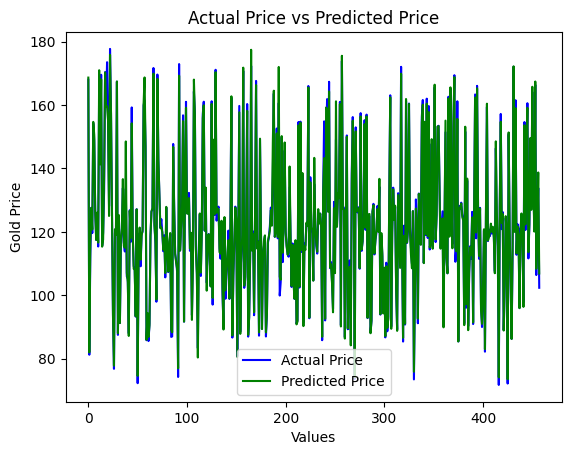

In [23]:
import matplotlib.pyplot as plt

plt.plot(y_test, color='blue', label='Actual Price')

plt.plot(test_data_pred, color='green', label='Predicted Price')

plt.title("Actual Price vs Predicted Price")

plt.xlabel("Values")

plt.ylabel("Gold Price")

plt.legend()

plt.show()
